In [10]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit

Seasonal variation, or seasonality, are cycles that repeat regularly over time. A cycle structure in a time series may or may not be seasonal. If it consistently repeats at the same frequency, it is seasonal, otherwise it is not seasonal and is called a cycle.

The model of seasonality can be removed from the time series. This process is called Seasonal Adjustment, or Deseasonalizing. A time series where the seasonal component has been removed is called seasonal stationary. A time series with a clear seasonal component is referred to as non-stationary.

In [3]:
series = read_csv('datasets/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

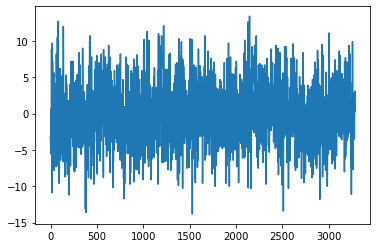

In [5]:
# Deseasonalize a time series using differencing
# Does not account for leap years (1984 and 1988)

X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

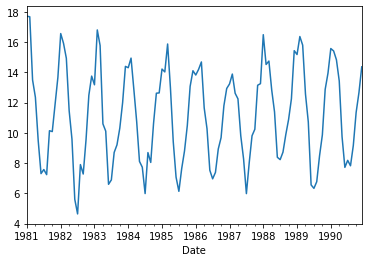

In [6]:
# Calculate and plot monthly average

resample = series.resample('M')
monthly_mean = resample.mean()
monthly_mean.plot()
pyplot.show()

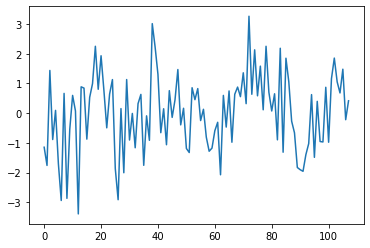

In [7]:
# Deseasonalize monthly data by differencing

diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean[i] - monthly_mean[i - months_in_year]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

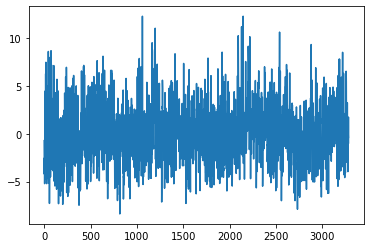

In [9]:
# Deseasonlize a time series using month-based differencing
# Robust to daily fluctuations in last year and also leap years
    
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    month_last_year_str = str(series.index[i].year-1) + '-' + str(series.index[i].month)
    month_mean_last_year = series[month_last_year_str].mean()
    value = X[i] - month_mean_last_year
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

Coefficients: [-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01
  1.38980178e+01]


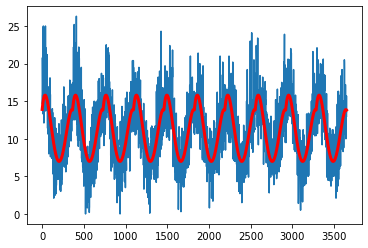

In [15]:
# Model seasonality with a polynomial model
# For consistent sine wave-like seasonality, a 4th order or 5th order polynomial is sufficient
# y = (x^4 × b1) + (x^3 × b2) + (x^2 × b3) + (x^1 × b4) + b5

X = [i%365 for i in range (0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)

# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
        
# plot curve
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

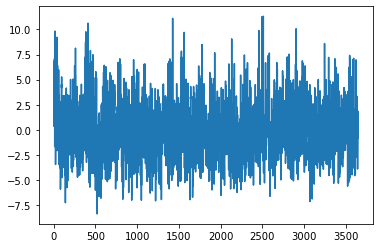

In [16]:
# Deseasonalize by differencing with a polynomial model

X = series.values
diff = list()
for i in range(len(X)):
    value = X[i] - curve[i]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()